In [1]:
# install PyAudio http://people.csail.mit.edu/hubert/pyaudio/
# pip install pyaudio
import pyaudio
import wave
import sys

# default settings for record and playback
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 22050

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  import sys


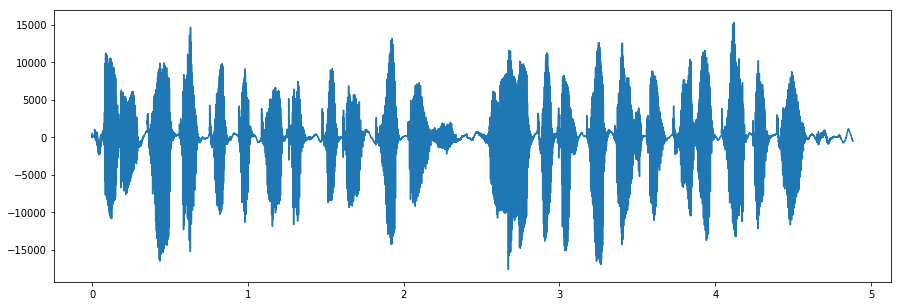

In [2]:
import numpy as np
import matplotlib.pyplot as plt

wave_file = "datasets/sound/peterpiper.wav"
wf = wave.open(wave_file, 'rb')
data = wf.readframes(-1)
signal = np.frombuffer(data, 'Int16')
time = [i / RATE for i in range(len(signal))]
plt.figure(figsize=(15,5))
plt.plot(time, signal)
plt.show()

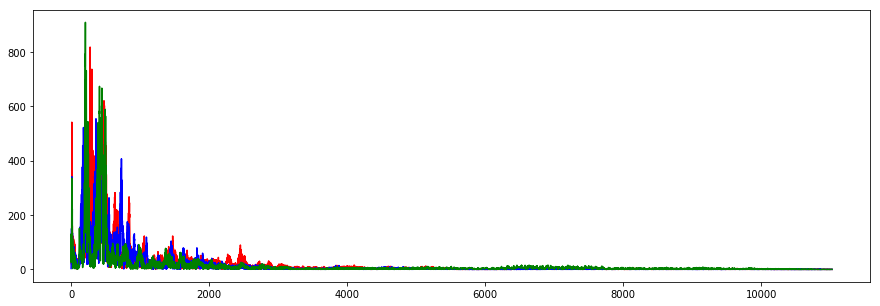

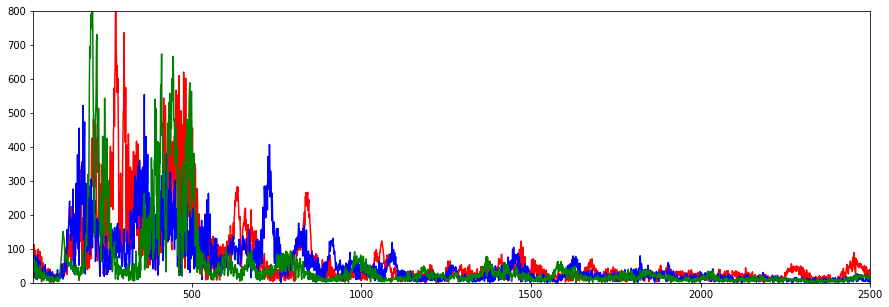

In [3]:
from scipy.fftpack import fft, ifft
from scipy.io import wavfile # get the api

norm_sig = [(x / 8192.) - 1 for x in signal]

complex_spectrum = fft(norm_sig[:RATE]) # calculate fourier transform for 1 sec. Values are complex
d = len(complex_spectrum) // 2          # you only need half of the fft list (real signal symmetry)
spectrum0 = abs(complex_spectrum[1:d])  # and only magnitude with no phase

complex_spectrum = fft(norm_sig[RATE:2*RATE])
spectrum1 = abs(complex_spectrum[1:d]) 

complex_spectrum = fft(norm_sig[RATE*2:3*RATE])
spectrum2 = abs(complex_spectrum[1:d]) 

plt.figure(figsize=(15,5))
plt.plot(spectrum0, color='r')
plt.plot(spectrum1, color='b')
plt.plot(spectrum2, color='g')
plt.show()

plt.figure(figsize=(15,5))
plt.ylim([0, 800])
plt.xlim([32, 2500])
plt.plot(spectrum0, color='r')
plt.plot(spectrum1, color='b')
plt.plot(spectrum2, color='g')
plt.show()

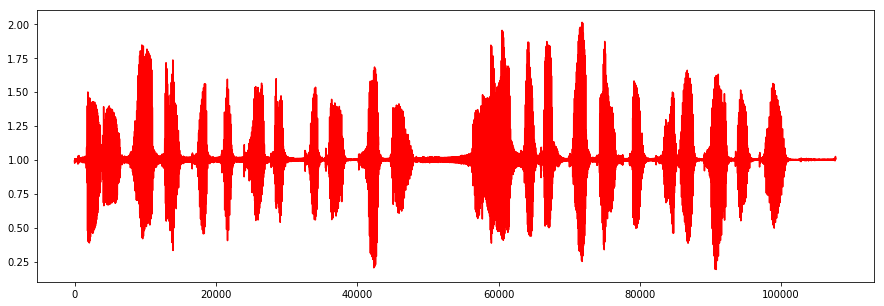

In [4]:
complex_spectrum = fft(norm_sig)
d = len(complex_spectrum) // 2 


# cut lower spectrum from 1 to 1000 Hz
complex_spectrum[1:1000] = 0
complex_spectrum[d+1:d+1000] = 0

# cut upper spectrum from 6000 Hz to inf.
complex_spectrum[6000:d] = 0
complex_spectrum[d+6001:] = 0
signal = abs(ifft(complex_spectrum))
plt.figure(figsize=(15,5))
plt.plot(signal, color='r')
plt.show()

de_norm_sig = (signal + 1.) * 8192.
data = de_norm_sig.astype(np.int16).tostring()

p = pyaudio.PyAudio()
out_stream = p.open(format=FORMAT,
            channels=wf.getnchannels(),
            rate=wf.getframerate(),
            output=True,
    )
out_stream.write(data)
out_stream.stop_stream()
out_stream.close()
p.terminate()